In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
# Load the Dataset
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
claimants.shape

(1340, 7)

In [6]:
# droping casenum column its not important
claimants.drop(['CASENUM'],inplace = True , axis =1) #

In [7]:
claimants.shape

(1340, 6)

In [8]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [9]:
# Removing NA values in dataset 
claimants = claimants.dropna()

In [10]:
claimants.shape

(1096, 6)

In [11]:
# Divided our data into input and output variables
X = claimants.iloc[:,1:] # Independent variable set : - CLMSEX , CLMINSUR , SEATBELT , CLMAGE , LOSS
Y = claimants.iloc[:,0]  # Dependent variable set : ATTORNEY

In [12]:
# [: , 1: ]  first : means all rows and starting 1 index to upto last index 
# [: , 0]   first : means all rows and only zero index 

In [13]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [14]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [15]:
# Logistic Regression and fit the model 
classifier = LogisticRegression() # initialize the model i.e called instance creation of class object.
# first create object 'classifier' for class LogisticRegression 
classifier.fit(X,Y) # then Use object to fit the model. this is the std methodology to biuld Any algorithm.

LogisticRegression()

In [16]:
# Predict for X dataset
y_pred = classifier.predict(X)

In [17]:
y_pred # Y hat values for x

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [18]:
# Create a dataframe
y_pred_df = pd.DataFrame({"Y" : Y,
                         'Yhat' : classifier.predict(X)})

In [19]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [20]:
# Confusion Matrix for the model accuracy 
# TP FP
# FN TN
from sklearn.metrics import confusion_matrix 

In [21]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [22]:
print(confusion_matrix)

[[381 197]
 [123 395]]


In [23]:
# Accuracy Of model
((381+395)/(381+197+123+395))*100

70.8029197080292

In [25]:
#ROC Curve

In [27]:
from sklearn.metrics import roc_curve  #roc - reciever operating characteristic
from sklearn.metrics import roc_auc_score  # auc area under curve

In [29]:
fpr, tpr , thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes 
# and the results are ordered by the label of classes i.e 0 and 1 
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values 
auc = roc_auc_score(Y,y_pred) # compute roc_auc_score based on y and y predicted

In [30]:
auc

0.7108589063606365

In [31]:
import matplotlib.pyplot as plt

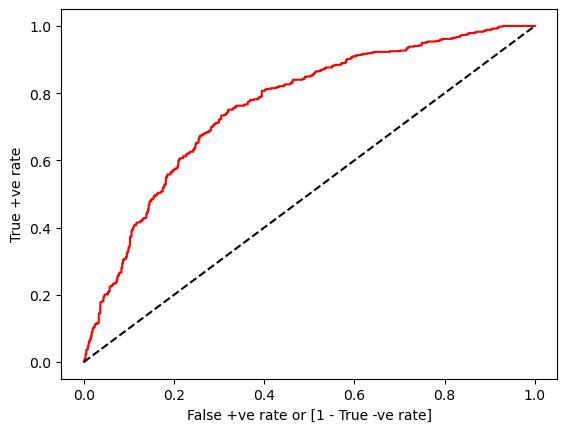

In [32]:
plt.plot(fpr,tpr , color = "red")
plt.plot([0,1],[0,1], "k--") # x axis range is 0 to 1 and y axis range is 0 to 1 , k-- is line type
plt.xlabel("False +ve rate or [1 - True -ve rate]")
plt.ylabel("True +ve rate")
plt.show()